In [1]:
import random
random.seed(a=613)
import numpy as np
import scProject
import scanpy as sc
patterns = sc.read_h5ad('patterns_anndata.h5ad')
dataset = sc.read_h5ad('/Users/asherbaraban/PycharmProjects/scProject/scProject/test/targetALS_elim_annotated_20200510/p6counts.h5ad')
dataset_filtered, patterns_filtered = scProject.matcher.filterAnnDatas(dataset, patterns, 'id')


/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(50127, 2996) dataset filter shape
(80, 2996) patterns filter shape


Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.


(415, 2996) (49712, 2996) (50127, 2996)
C1 is dense
C2 is dense


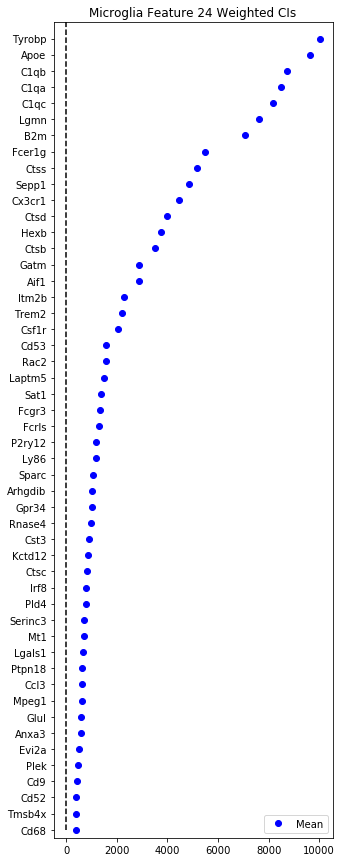

In [2]:
import matplotlib.pyplot as plt
import numpy as np
microglia= dataset_filtered[dataset_filtered.obs['assigned_cell_type'].isin(['Microglia'])].copy()
others= dataset_filtered.obs['assigned_cell_type'].unique().remove_categories('Microglia')
rest = dataset_filtered[dataset_filtered.obs['assigned_cell_type'].isin(list(others))].copy()
print(microglia.shape, rest.shape, dataset_filtered.shape)

microglia.X = np.log2(microglia.X + 1e-30) #log transform for statistical tests
rest.X = np.log2(rest.X + 1e-30) #log transform for statistcal tests

plt.rcParams['figure.figsize']= [5,50]
df24 = scProject.stats.projectionDriver(patterns_filtered, microglia, rest,.999999999999,'gene_short_name', 24, display=False)

sigs24 = df24[0].index
WCIS24 = df24[1].loc[sigs24]
WCIS24['rank'] = abs(WCIS24['Low']+WCIS24['High'])
WCIS24 = WCIS24.sort_values(by='rank', ascending=False).head(50)

counter = len(WCIS24)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 15]
for idx,low, high,y in zip(list(WCIS24.index) ,WCIS24['Low'], WCIS24['High'], range(len(WCIS24))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 24 Weighted CIs")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("2457MG/MicrogliaF24Weighted.pdf", bbox_inches='tight')
plt.show()

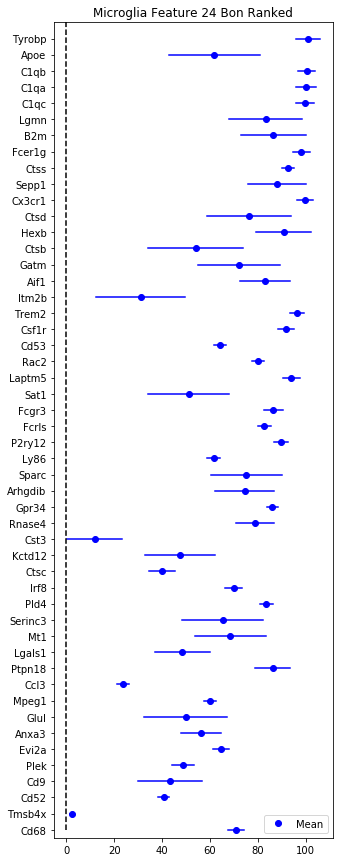

In [3]:
# Bon CIs
CIS24 = df24[0].loc[WCIS24.index]

counter = len(CIS24)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 15]
for idx,low, high,y in zip(list(CIS24.index) ,CIS24['Low'], CIS24['High'], range(len(CIS24))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 24 Bon Ranked")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("2457MG/MicrogliaF24Bon.pdf", bbox_inches='tight')
plt.show()

C1 is dense
C2 is dense


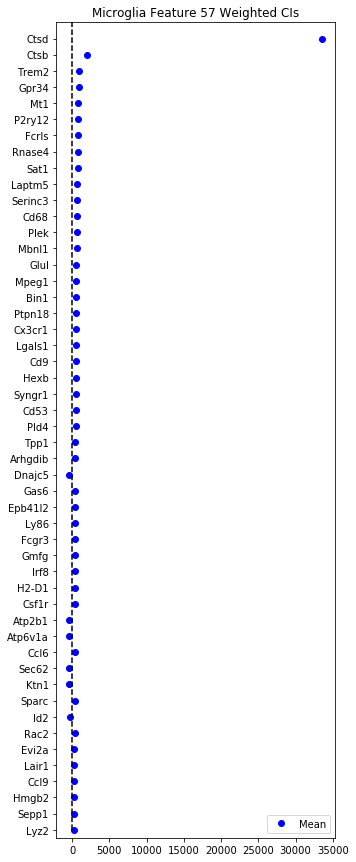

In [4]:
df57 = scProject.stats.projectionDriver(patterns_filtered, microglia, rest,.999999999999,'gene_short_name', 57, display=False)

sigs57 = df57[0].index
five7WCIS = df57[1].loc[sigs57]
five7WCIS['rank'] = abs(five7WCIS['Low']+five7WCIS['High'])
five7WCIS = five7WCIS.sort_values(by='rank', ascending=False).head(50)

counter = len(five7WCIS)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 15]
for idx,low, high,y in zip(list(five7WCIS.index) ,five7WCIS['Low'], five7WCIS['High'], range(len(five7WCIS))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 57 Weighted CIs")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("2457MG/MicrogliaF57Weighted.pdf", bbox_inches='tight')
plt.show()

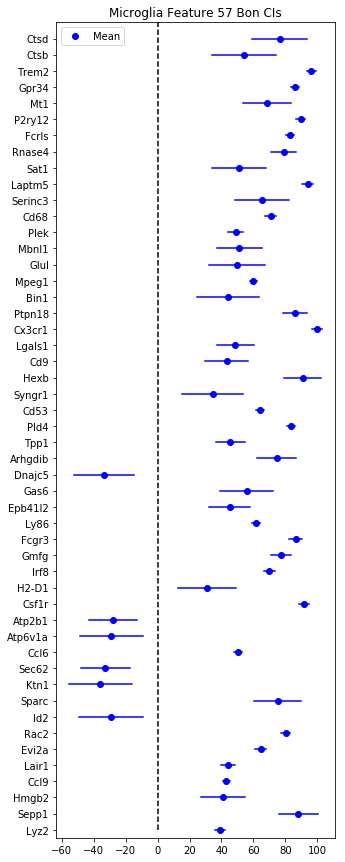

In [5]:
# Bon CIs
five7WCIS = df57[0].loc[five7WCIS.index]

counter = len(five7WCIS)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 15]
for idx,low, high,y in zip(list(five7WCIS.index) ,five7WCIS['Low'], five7WCIS['High'], range(len(five7WCIS))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 57 Bon CIs")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("2457MG/MicrogliaF57Bon.pdf", bbox_inches='tight')
plt.show()

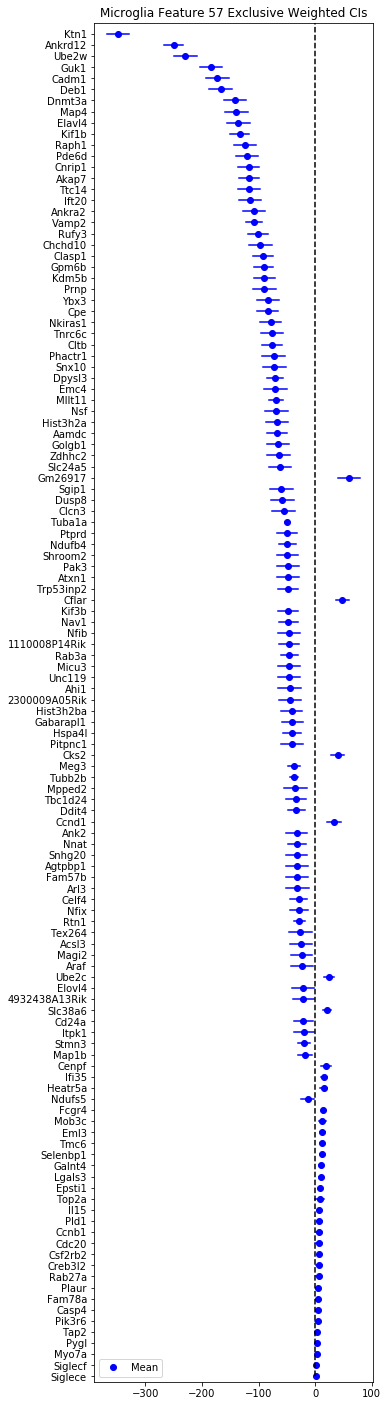

In [6]:
# 57 exclusive
e57 = df57[0].index.difference(df24[0].index)
exclusive57WCIS = df57[1].loc[e57]
exclusive57WCIS['rank'] = abs(exclusive57WCIS['Low']+exclusive57WCIS['High'])
exclusive57WCIS = exclusive57WCIS.sort_values(by='rank', ascending=False)

counter = len(exclusive57WCIS)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 25]
for idx,low, high,y in zip(list(exclusive57WCIS.index) ,exclusive57WCIS['Low'], exclusive57WCIS['High'], range(len(exclusive57WCIS))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 57 Exclusive Weighted CIs")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("2457MG/MicrogliaF57ExclusiveWeighted.pdf", bbox_inches='tight')
plt.show()

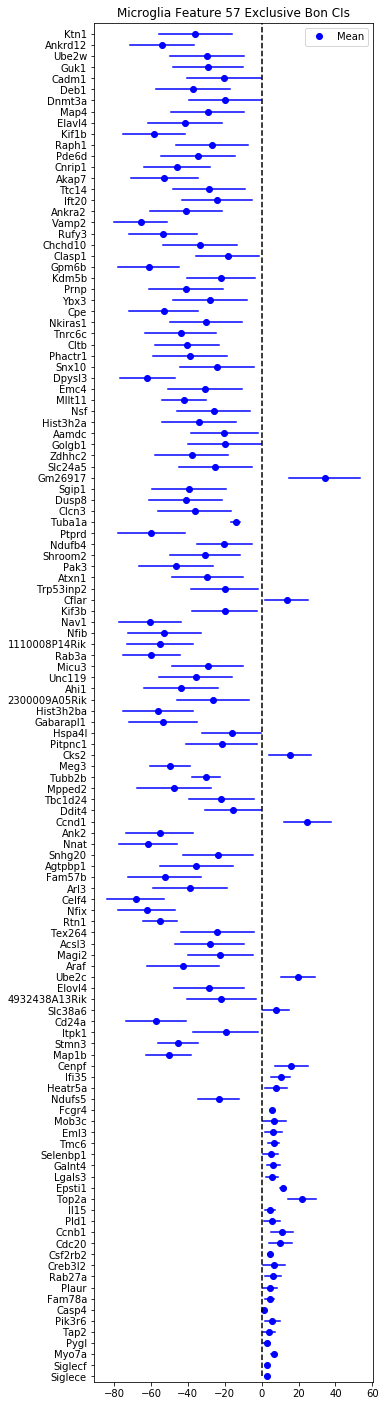

In [7]:
# Bon CIs
exclusive57CIS = df57[0].loc[exclusive57WCIS.index]

counter = len(exclusive57CIS)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 25]
for idx,low, high,y in zip(list(exclusive57CIS.index) ,exclusive57CIS['Low'], exclusive57CIS['High'], range(len(exclusive57CIS))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 57 Exclusive Bon CIs")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("2457MG/MicrogliaF57ExclusiveBon.pdf", bbox_inches='tight')
plt.show()

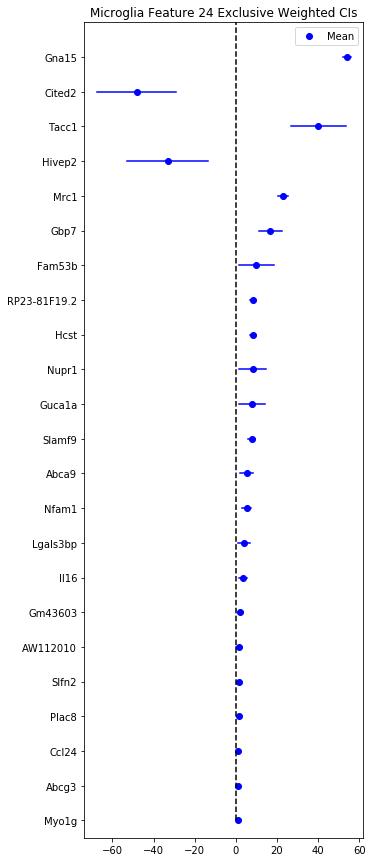

In [8]:
# 24 exclusive
e24 = df24[0].index.difference(df57[0].index)
exclusive24WCIS = df24[1].loc[e24]
exclusive24WCIS['rank'] = abs(exclusive24WCIS['Low']+exclusive24WCIS['High'])
exclusive24WCIS = exclusive24WCIS.sort_values(by='rank', ascending=False)

counter = len(exclusive24WCIS)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 15]
for idx,low, high,y in zip(list(exclusive24WCIS.index) ,exclusive24WCIS['Low'], exclusive24WCIS['High'], range(len(exclusive24WCIS))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 24 Exclusive Weighted CIs")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("2457MG/MicrogliaF24ExclusiveWeighted.pdf", bbox_inches='tight')
plt.show()

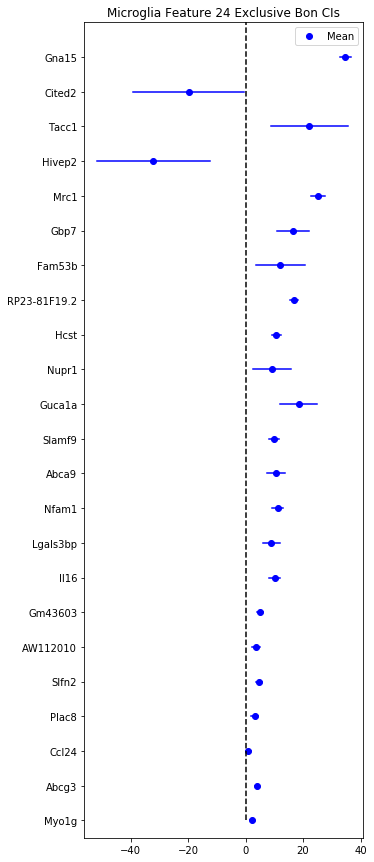

In [9]:
# 24 Exclusive Bon CIs
exclusive24CIS = df24[0].loc[exclusive24WCIS.index]

counter = len(exclusive24CIS)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 15]
for idx,low, high,y in zip(list(exclusive24CIS.index) ,exclusive24CIS['Low'], exclusive24CIS['High'], range(len(exclusive24CIS))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 24 Exclusive Bon CIs")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("2457MG/MicrogliaF57ExclusiveBon.pdf", bbox_inches='tight')
plt.show()

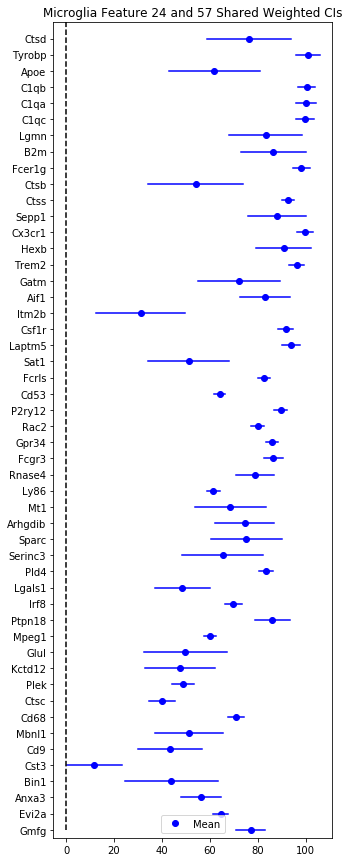

In [10]:
# shared genes
import pandas as pd
shared = df24[0].index.intersection(df57[0].index)
shared24WCI = df24[1].loc[shared]
shared57WCI = df57[1].loc[shared]
shared24WCI.columns = ['24Low', '24High']
shared57WCI.columns = ['57Low', '57High']
shared24WCI['rank24'] = abs(shared24WCI['24Low']+shared24WCI['24High'])
shared57WCI['rank57'] = abs(shared57WCI['57Low']+shared57WCI['57High'])

tog = pd.concat([shared57WCI, shared24WCI], axis=1)
tog['rank'] = tog['rank24'] + tog['rank57']
tog = tog.sort_values(by='rank', ascending=False).head(50)

# Bon CIs
sharedCIs = df24[0].loc[tog.index]

counter = len(sharedCIs)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 15]
for idx,low, high,y in zip(list(tog.index) ,sharedCIs['Low'], sharedCIs['High'], range(len(sharedCIs))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 24 and 57 Shared Weighted CIs")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("2457MG/F24andF57shared.pdf", bbox_inches='tight')
plt.show()

In [18]:
for i in exclusive57CIS[(exclusive57CIS['Low']>0) & (exclusive57CIS['High']>0)].index:
    print(i)

Gm26917
Cflar
Cks2
Ccnd1
Ube2c
Slc38a6
Cenpf
Ifi35
Heatr5a
Fcgr4
Mob3c
Eml3
Tmc6
Selenbp1
Galnt4
Lgals3
Epsti1
Top2a
Il15
Pld1
Ccnb1
Cdc20
Csf2rb2
Creb3l2
Rab27a
Plaur
Fam78a
Casp4
Pik3r6
Tap2
Pygl
Myo7a
Siglecf
Siglece
